# ***PROJECT DATA SCIENCE COURSE : PREDICT THE QUALITY OF AN APPLE USING MACHINE LEARNING***

So this project is used for a final project/task from Data Science Course that held by SCC HIMASTA-ITS. In this project, we as a data scientist have to predict the quality of an apple using many variables that represents the apple. In this project,I used 3 different model such as Logistic Reggression,Support Vector Machine and Decision Tree Classifier

### **ABOUT THE DATASET**

The agricultural industry, particularly apple plantations, faces various challenges in ensuring that every harvested apple meets quality standards. Apple quality can be affected by various factors such as diseases, pests, weather conditions, and maintenance techniques. The manual inspection process for apples often takes a significant amount of time and is prone to human error. Therefore, a model is needed to assist in the apple inspection process with accuracy.

Variables Description :
- A_id - definition of example_id
- Size - apple dimensions
- Weight - apple mass
- Sweetness - apple taste
- Crunchiness - apple texture
- Juiciness - apple moisture
- Ripeness - apple maturity
- Acidity - apple tartness
- Quality - apple quality

### **IMPORT LIBRARY AND READ THE DATASET**

In [1]:
#import the library that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#read the dataset
df = pd.read_csv("apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


## **EXPLORATORY DATA ANALYSIS**

In [3]:
#check the types of the dataset
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

In [4]:
df['Acidity']=pd.to_numeric(df['Acidity'],errors='coerce')

In [5]:
#give the simple stats of the dataset
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


### **PREPROCESSING**

In [6]:
#checking missing value in the datasets
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [7]:
#drop the rows that have missing value
df = df.dropna()

In [8]:
#check again the missing value in the dataset
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
#checking duplicated value
df.duplicated().sum()

0

### **VISUALIZE THE DATASET**

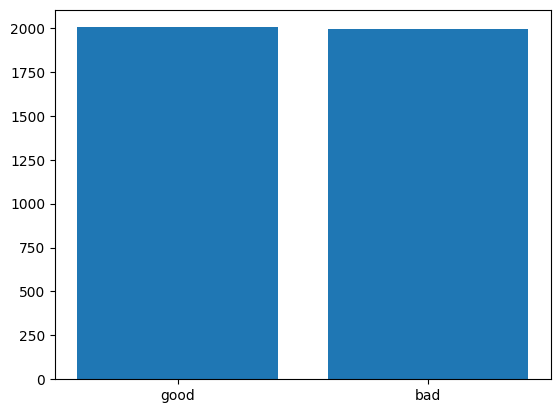

In [10]:
#creating bar plot
jumlahgoodbad = df['Quality'].value_counts()

plt.bar(jumlahgoodbad.index,jumlahgoodbad.values)
plt.show()

<Axes: xlabel='Sweetness', ylabel='Crunchiness'>

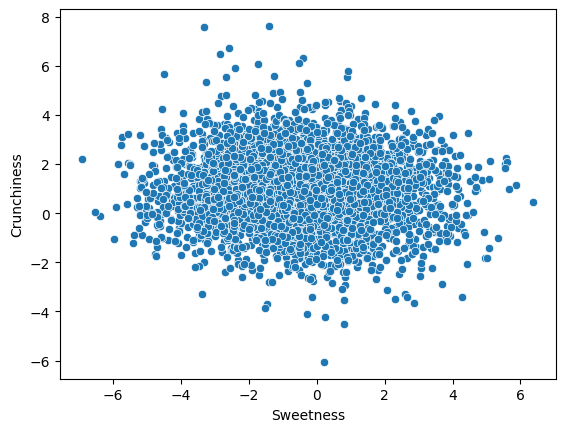

In [11]:
sns.scatterplot(x=df['Sweetness'],y=df['Crunchiness'])

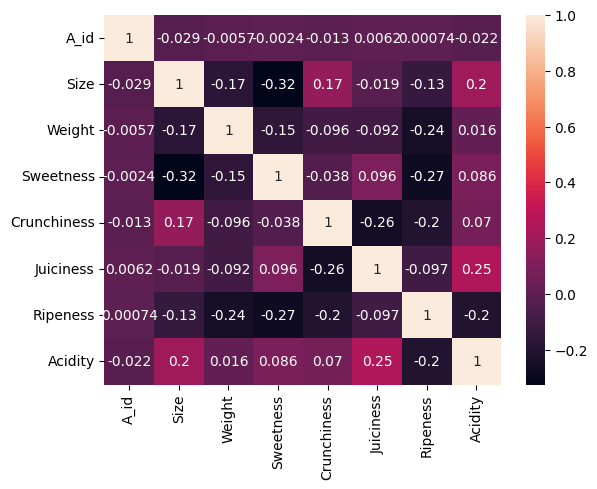

In [12]:
#creating a heatmap for the dataset for knowing the correlation between each variable
df_heatmap = df.drop(columns=['Quality'])

corr =df_heatmap.corr()

sns.heatmap(corr,annot=True)
plt.show()

### **BUILD THE MODEL**

In [13]:
# Define features (X) and target (y)
X = df.drop(columns=['Quality'])  # Features
y = df['Quality']                  # Target variable

# Split the data into training and testing sets
# Ensure you are passing both X and y to train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**LOGISTIC REGRESSION**

In [14]:
#declare the model
logistic = LogisticRegression(max_iter=2000,random_state=42)
logistic.fit(X_train.iloc[:, 1:], y_train) 

LogisticRegression(max_iter=2000, random_state=42)

In [15]:
# Koefisien dan variansi
coef = logistic.coef_[0]
intercept = logistic.intercept_
variance = np.diag(np.linalg.inv(np.dot(X.T, X)))  # Perkiraan variansi
se = np.sqrt(variance)  # Standard error

# Menghitung Z-score
z_scores = coef / se[1:]  # Hanya variabel selain intercept
p_values = [stats.norm.sf(abs(z)) * 2 for z in z_scores]

print("P-values:", p_values)


P-values: [0.0, 1.1956654803916882e-123, 0.0, 0.03840729902838514, 0.0, 1.302733102612164e-35, 0.0]


The p-value is less than 0.05, indicating that the result is statistically significant.

In [16]:
logistic = LogisticRegression(max_iter=2000,random_state=42)
logistic.fit(X_train,y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [17]:
#Predict the dataset
y_pred_logistic = logistic.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.75
Confusion Matrix:
[[302  99]
 [ 98 301]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.76      0.75      0.75       401
        good       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800



**SUPPORT VECTOR MACHINE**

In [18]:
#declare the model and predict with the model
svc_model = SVC(probability=True,random_state=42)

svc_model.fit(X_train,y_train)

y_pred_svc = svc_model.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svc)
conf_matrix = confusion_matrix(y_test, y_pred_svc)
class_report = classification_report(y_test, y_pred_svc)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.49
Confusion Matrix:
[[208 193]
 [217 182]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.49      0.52      0.50       401
        good       0.49      0.46      0.47       399

    accuracy                           0.49       800
   macro avg       0.49      0.49      0.49       800
weighted avg       0.49      0.49      0.49       800



**Decision Tree Classifier with Grid Search CV**

In [20]:
#Declare the model
dt_model = DecisionTreeClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
print("Best parameters:", grid_search.best_params_)

# Train the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Best parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy: 0.81
Confusion Matrix:
[[323  78]
 [ 70 329]]
Classification Report:
              precision    recall  f1-score   support

         bad       0.82      0.81      0.81       401
        good       0.81      0.82      0.82       399

    accuracy                           0.81       800
   macro avg       0.82      0.82      0.81       800
weighted avg       0.82      0.81      0.81       800



The results showed that Decision Tree Classifier have the highest percentage of predict the quality of an apple. So we can use DTC as our main model in predicting the quality of an apple.

**Suggestion:** 

Before performing modeling, it is advisable to conduct more detailed preprocessing, such as carefully checking for outliers to ensure they don't negatively affect predictions. It is also beneficial to explore the machine learning method being used or consider trying deep learning.